In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [17]:
df_eval = pd.read_csv('../data/Evaluation_Set/RFMiD_Validation_Labels.csv')

In [18]:
df_train = pd.read_csv('../data/Training_Set/RFMiD_Training_Labels.csv')

In [19]:
df_test = pd.read_csv('../data/Test_Set/RFMiD_Testing_Labels.csv')

In [20]:
df_train.head()

,ID,Disease_Risk,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Creating a different df to store disease risk column for the data

In [21]:
df_disease_risk_train = df_train['Disease_Risk']
df_disease_risk_eval = df_eval['Disease_Risk']
df_disease_risk_test = df_test['Disease_Risk']

In [22]:
df_train.drop(['Disease_Risk'], axis=1, inplace=True)
df_eval.drop(['Disease_Risk'], axis=1, inplace=True)
df_test.drop(['Disease_Risk'], axis=1, inplace=True)

In [23]:
df_train.head()

,ID,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_eval.head()

,ID,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_test.head()

,ID,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
## making ID column as index
df_train.set_index('ID', inplace=True)
df_eval.set_index('ID', inplace=True)
df_test.set_index('ID', inplace=True)

In [27]:
df_train = df_train[['DR', 'MH', 'TSLN', 'ODC']]
df_eval = df_eval[['DR', 'MH', 'TSLN', 'ODC']]
df_test = df_test[['DR', 'MH', 'TSLN', 'ODC']]
print("shape of train data: ", df_train.shape)
print("shape of eval data: ", df_eval.shape)
print("shape of test data: ", df_test.shape)

shape of train data:  (1920, 4)
shape of eval data:  (640, 4)
shape of test data:  (640, 4)


In [28]:
## removing the rows which have no diseases
df_train = df_train[df_train.sum(axis=1) != 0]
df_eval = df_eval[df_eval.sum(axis=1) != 0]
df_test = df_test[df_test.sum(axis=1) != 0]

In [31]:
print("shape of train data: ", df_train.shape)
print([c[0] for c in df_train if c["DR"]==1])
print("shape of eval data: ", df_eval.shape)
print("shape of eval data: ", df_test.shape)

shape of train data:  (949, 4)


TypeError: string indices must be integers

In [51]:
df_train.head()

,DR,MH,TSLN,ODC
ID,,,,
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,1,0,1
5,1,0,0,0


In [52]:
df_eval.head()

,DR,MH,TSLN,ODC
ID,,,,
1,1,0,1,0
11,1,0,0,0
12,1,0,0,0
20,1,0,0,0
23,0,0,1,0


In [53]:
## adding the disease risk column to the train and eval data with ID as index
df_train['Disease_Risk'] = df_disease_risk_train
df_eval['Disease_Risk'] = df_disease_risk_eval
df_test['Disease_Risk'] = df_disease_risk_test

In [54]:
df_train.head()

,DR,MH,TSLN,ODC,Disease_Risk
ID,,,,,
1,1,0,0,0,1
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,1,1
5,1,0,0,0,1


Im encode the image data,
Subsampling the data. 

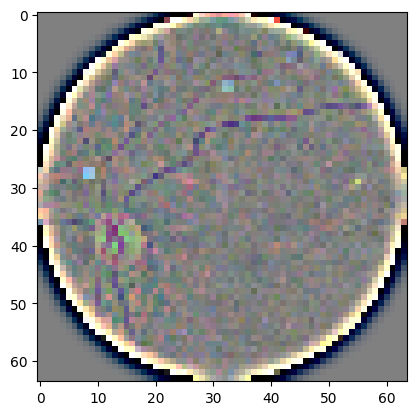

In [55]:
## opening an image and converting it to numpy array
import cv2
import matplotlib.pyplot as plt

def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img
    
    
def circle_crop(img):   
    """
    Create circular crop around image centre    
    """    
    img = crop_image_from_gray(img)    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    img=cv2.addWeighted(img,4, cv2.GaussianBlur( img , (0,0) , 30) ,-4 ,128)
    return img

img = cv2.imread('../data/Training_Set/Training/103.png')
img = circle_crop(img)
img = crop_image_from_gray(img)
img = cv2.resize(img, (64, 64))
plt.imshow(img)

In [56]:
img
print(img.shape)

(64, 64, 3)


In [57]:
## size of the image in mb after preprocessing
import sys
print(sys.getsizeof(img)/1000000)

0.012432


In [58]:
import os
import cv2
import numpy as np

def preprocess_image(file_path):
    img = cv2.imread(file_path)
    img = circle_crop(img)
    img = crop_image_from_gray(img)
    img = cv2.resize(img, (64, 64))
    plt.imshow(img)
    return img

In [65]:
import os
## preprocessing the train images
output_path = '../data/Training_Set/preprocessed_numpy_64'
input_path = '../data/Training_Set/Training'
__location__ = os.path.realpath(
    os.path.join(os.getcwd(), os.path.dirname(os.path.abspath(''))))
for file in os.listdir(input_path):
    if file.endswith('.png'):
        img = preprocess_image(os.path.join(input_path, file))  
        np.save(os.path.join(__location__ + "\data\Training_Set\preprocessed_numpy_64", file.split('.')[0]), img)

In [66]:
## preprocessing the valdaition images
output_path = '../data/Evaluation_Set/preprocessed_eval_64'
input_path = '../data/Evaluation_Set/Validation'
__location__ = os.path.realpath(
    os.path.join(os.getcwd(), os.path.dirname(os.path.abspath(''))))
for file in os.listdir(input_path):
    if file.endswith('.png'):
        img = preprocess_image(os.path.join(input_path, file))
        np.save(os.path.join(__location__ + "\data\Evaluation_Set\preprocessed_eval_64", file.split('.')[0]), img)

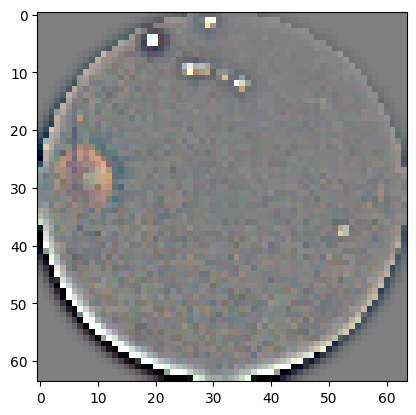

In [59]:
## preprocessing the valdaition images
output_path = '../data/Test_Set/preprocessed_test_64'
input_path = '../data/Test_Set/Test'
__location__ = os.path.realpath(
    os.path.join(os.getcwd(), os.path.dirname(os.path.abspath(''))))
for file in os.listdir(input_path):
    if file.endswith('.png'):
        img = preprocess_image(os.path.join(input_path, file))
        np.save(os.path.join(__location__ + "\data\Test_Set\preprocessed_test_64", file.split('.')[0]), img)

In [85]:
file_loc = '../data/Training_Set/preprocessed_numpy_64/'

array = []
for i in df_train.index:
    array.append(str(i)+'.npy')

## only keeping the images in the folder which are in the index of df_train
for file in os.listdir(file_loc):
    if file not in array:
        os.remove(file_loc+file)

In [86]:
## checking if the number of images in the folder is same as the number of rows in the dataframe
print(len(os.listdir(file_loc)))

949


In [87]:
df_train.shape

(949, 5)

In [88]:
file_loc = '../data/Evaluation_Set/preprocessed_eval_64/'

array = []
for i in df_eval.index:
    array.append(str(i)+'.npy')

## only keeping the images in the folder which are in the index of df_train
for file in os.listdir(file_loc):
    if file not in array:
        os.remove(file_loc+file)

In [89]:
print(len(os.listdir(file_loc)))

295


In [67]:
file_loc = '../data/Test_Set/preprocessed_test_64/'

array = []
for i in df_test.index:
    array.append(str(i)+'.npy')

## only keeping the images in the folder which are in the index of df_train
for file in os.listdir(file_loc):
    if file not in array:
        os.remove(file_loc+file)
print(len(os.listdir(file_loc)))

296


In [66]:
df_test.shape

(296, 5)